This notebook contains an excerpt from the Python Programming and Numerical Methods - A Guide for Engineers and Scientists, the content is also available at Berkeley Python Numerical Methods.

The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the MIT license. If you find this content useful, please consider supporting the work on Elsevier or Amazon!

Soruce Link: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter13.00-Parallel-Your-Python.html

## Chapter 13. Parallel Your Python

### CHAPTER OUTLINE

---
*  Parallel Computing Basics

*  Multiprocessing

*  Use joblib

*  Summary and Problems
---


#### Motivation

Let’s say you want to empty a tank that full of water.

- If I give you one water pipe, you can connected to the bottom of the tank to let the water out. 
- If I give you another water pipe, using both of the pipes will empty the tank in only half of the time. 

The more water pipes you can connected to the bottom of the tank, the faster you can empty it. The similar thing exist in modern computers as well. Most of our computers these days have a multi-core processor design, which means that we can process the tasks in parallel fashion like using multiple pipes to drain the tank.

**In this chapter, we will introduce your how to run your Python program in parallel so that we can reduce the time of completing the task.**

For smaller project, the benefit may not seem obvious. But for some complicated projects, the gain is significantly. 

For example, if I give you a homework that normally you need to wait for 1 hour until you can tell whether your code is correct or not. If you find something is wrong, and you change your code accordingly. Now it is time to wait another hour to find out whether your modification is proper. At the end, you made changes for 20 times, and spend more than a day to get it right. But if you can run your algorithms in a parallel way, the running time of your code may shrink to 5 min. 20 times modification only cost you less than 2 hours. Now you see why we bother to learn how to run our code faster using the parallelization.

---


### Parallel Computing Basics

---
We now have a working knowledge of Python, and soon we will start to use it to analyze data and numerical analysis. 

Before we go deeper, we need to cover parallel computing in Python. This means you will be able to run your code simultaneously on multiple cores on your CPU processor (or multiple CPU processors) or increase the speed by taking advantage of the wasted CPU cycles while your program is waiting for external resources (i.e., downloading files, API calls, etc.). 

The fundamental idea of parallel computing is rooted in doing multiple tasks at the same time to reduce the running time of your program. The following figure illustrates the simple idea of doing parallel computing versus serial computing that we used so far. 

For example, if you have 1 million data files and need to apply the same operations to each one of them, you can do this one file at each time, or you can do it by multiple files at the same time; or if you are downloading 1 million websites, you can take advantage of downloading 10 at a time to reduce the total time of downloading. Therefore, learning the basics of parallel computing will help you design code that is more efficient.

---

![](./1-Figures/13.01.01-parallel_vs_serial.png)

---
Most of the modern computers are using the multi-core design, which means on a single computing component, there are multiple independent processing units, the so called cores, that are available to do different tasks. 

For example, on my laptop, there is 1 CPU processor, with 6 physical cores on it (see the following figure), each of this physical cores has two logical cores, which will bring the total number of 12 cores (see the next section when we print out the total number of CPU on your machine).

---
![](./1-Figures/13.01.01-my-hardware.png)

---
In Python, there are two basic approaches to conduct parallel computing, that is using the **multiprocessing or threading** library. 

Let’s first take a look of the differences of **process and thread**.

---

## Process and thread

* A process is an instance of a program (such as Python interpreter, Jupyter notebook etc.). A process is created by the operating system to run program, and each process has its own memory block. 

* A thread is a sub-process that reside within the process. 

*Each process can have multiple threads, that these threads will share the same memory block within the process.*

Therefore, for multiple threads in a process, due to the shared memory space, the variables or objects are all shared. If you change one variable in one thread, it will change for all the other threads. But things are different in different processes, change one variable in one process will not change the one in other processes. Process and thread both have advantages or disadvantages, and can be used in different tasks to maximize the benefits.

---


## Python’s GIL problem

Python has something called Global Interpreter Lock (GIL) which allow only one native thread to run at a time, it prevents multiple threads from running simultaneously. 

This is because Python was designed before the multi-core processor on the personal computers (this shows you how old the language is). Even though there are workarounds in Python to do multi-threading programming, we will only cover the **multiprocessing library** in the next section, which we will use most of the time for taking advantage of multi-core parallel computing.

---


### Disadvantage of using parallel computing

Of course, there are disadvantages of using parallel computing. Such as, more complicated code, overheads when spawn new processes and maintain them. Thus, if your task is small, using parallel computing will take longer time, since it takes time for the system to initialize new process and maintain them.

---

## Multiprocessing

The multiprocessing library is the Python’s standard library to support parallel computing using processes. It has many different features, if you want to know all the details, you can check the [official documentation](https://docs.python.org/3/library/multiprocessing.html). Here we will introduce the basics to get you start with parallel computing. Let’s start by importing the library.

In [1]:
import multiprocessing as mp

In [2]:
# Let’s first print out the total number of CPUs that on my machine that can be used for parallel computing.

print(f"Number of cpu: {mp.cpu_count()}")

Number of cpu: 4


In [39]:
# NumPy random seed is simply a function that sets the random seed of the NumPy pseudo-random number generator.
# It provides an essential input that enables NumPy to generate pseudo-random numbers for random processes
# a pseudo-random number is a number that’s almost random, but not really random.
# Pseudo-random numbers are numbers that appear to be random, but are not actually random.
# According to the encyclopedia at Wolfram Mathworld, a pseudo-random number is:
# … a computer-generated random number.
import numpy as np
np.random.seed(0)
np.random.randint(low = 1, high = 10, size = 50)

array([6, 1, 4, 4, 8, 4, 6, 3, 5, 8, 7, 9, 9, 2, 7, 8, 8, 9, 2, 6, 9, 5,
       4, 1, 4, 6, 1, 3, 4, 9, 2, 4, 4, 4, 8, 1, 2, 1, 5, 8, 4, 3, 8, 3,
       1, 1, 5, 6, 6, 7])

In [4]:
np.random.seed(0)
np.random.randint(99, size = 5)

array([44, 47, 64, 67, 67])

In [5]:
np.random.seed(1)
np.random.randint(99, size = 5)

array([37, 12, 72,  9, 75])

In [6]:
np.random.seed(2)
np.random.randint(99, size = 5)

array([40, 15, 72, 22, 43])

- Here, the code for np.random.randint is exactly the same … we only changed the seed value. Here, the seed is 1.

- With a different seed, NumPy random randint created a different set of integers. Everything else is the same. The code for np.random.randint is the same. But with a different seed, it produces a different output.

- Ultimately, I want you to understand that the output of a numpy.random function ultimately depends on the value of np.random.seed, but the choice of seed value is sort of arbitrary.

In [7]:
# Serial version
import numpy as np
import time

Let’s use an example to show you how to use multiple cores in one machine to reduce the time of execution time.

EXAMPLE: Generate 10,000,000 random numbers between 0 and 10, and square the number. Store the results in a list.

In [44]:
def random_square(seed):
    np.random.seed(seed)
    random_num = np.random.randint(0, 10)
    return random_num**2
t0 = time.time()
results = []
for i in range(10000): 
    results.append(random_square(i))
t1 = time.time()
print(f'Execution time {t1 - t0} s')

Execution time 0.14690589904785156 s


Execution time 0.16589927673339844 s


## Parallel version

The simplest way to do parallel computing using the multiprocessing is to use the <Pool> class. 
    
There are 4 common methods in the class that we may use often, that is 
    -apply, 
    -map, 
    -apply_async 
    -map_async. 
    
Have a look of the documentation for the differences, and we will only use map function below to parallel the above example. 
    
The <map(func,iterable)> function takes in two arguments, and apply the function func to each element in the iterable, and then collect the results.

In [42]:
if __name__ == "main":

    t0 = time.time()
    n_cpu = mp.cpu_count()

    pool = mp.Pool(processes=n_cpu)
    results = [pool.map(random_square, range(10000))]
    t1 = time.time()

print(f'Execution time {t1 - t0} s')

Execution time 0.16589927673339844 s


For an explanation of why the if __name__ == '__main__' part is necessary, see [Programming guidelines](https://docs.python.org/3/library/multiprocessing.html#multiprocessing-programming).

## Visualize the execution time

Let’s visualize the execution time changes versus the number of data points using both the serial and parallel version. And you will see that until certain point, it is better to use the serial version.

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

In [28]:
def serial(n):
    t0 = time.time()
    results = []
    for i in range(n): 
        results.append(random_square(i))
    t1 = time.time()
    exec_time = t1 - t0
    return exec_time

def parallel(n):
    if __name__ == "main":
        t0 = time.time()
        n_cpu = mp.cpu_count()

        pool = mp.Pool(processes=n_cpu)
        results = [pool.map(random_square, range(n))]
        t1 = time.time()
        exec_time = t1 - t0
        return exec_time

In [34]:
n_run = np.logspace(1, 7, num = 7)

t_serial = [serial(int(n)) for n in n_run]
t_parallel = [parallel(int(n)) for n in n_run]

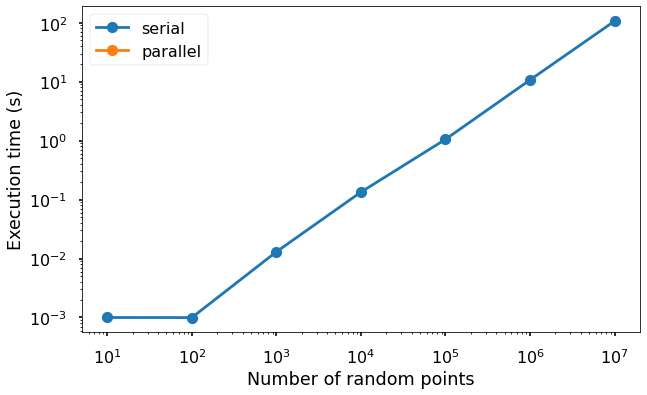

In [35]:
plt.figure(figsize = (10, 6))
plt.plot(n_run, t_serial, '-o', label = 'serial')
plt.plot(n_run, t_parallel, '-o', label = 'parallel')
plt.loglog()
plt.legend()
plt.ylabel('Execution time (s)')
plt.xlabel('Number of random points')
plt.show()

![](1-Figures/chapter13.02-Multiprocessing_16_0.png)

We can see from the figure that when the number of data points are small (below 10000), the execution time for the serial version is faster due to the overheads of the parallel version from launching and maintaining the new processes. But after that, we can see clearly the winner be the parallel version.

In [ ]:
from multiprocessing import Pool

def f(x):
    return x*x

if __name__ == '__main__':
    with Pool(5) as p:
        print(p.map(f, [1, 2, 3]))